In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [21]:
# Define a function to clean column names
def clean_columns(col):
    if "Unnamed" in col[0]:
        return col[1].replace('_', '')
    elif "Institute" in col[1]:
        return col[1] 
    else:
        return col[0] + '_' + col[1]  # Add a hyphen between the first and second level

In [24]:
file_list1 = ['Table_0607.xls','Table_0708.xls', 'Table_0809.xls']
file_list2 = ['Table_0910.xls','Table_1011.xls', 'Table_1112.xls',
              'Table_1213.xlsx','Table_1314.xlsx', 'Table_1415.xlsx',
              'Table_1516.xlsx','Table_1617.xlsx']

In [25]:
merged_df1 = pd.DataFrame()
merged_df2 = pd.DataFrame()

In [26]:
# Reading Files for file list 1:
for filename in file_list1:
    df = pd.read_excel(filename, header=[0, 1])
    df.columns = [clean_columns(col) for col in df.columns]
    merged_df1 = pd.concat([merged_df1, df], ignore_index=True)

In [27]:
# Reading Files for file list 2:
for filename in file_list2:
    df = pd.read_excel(filename, header=[0, 1])
    df.columns = [clean_columns(col) for col in df.columns]
    merged_df2 = pd.concat([merged_df2, df], ignore_index=True)

In [29]:
merged_df1.head(3)

,Year,Region,Institute,Postgraduate_Work only,Postgraduate_Work & study,Postgraduate_Study only,Postgraduate_Assumed to be unemployed,Postgraduate_Not available for employment and Other,Postgraduate_Total,First degree_Work only,...,First degree_Study only,First degree_Assumed to be unemployed,First degree_Not available for employment and Other,First degree_Total,Other undergraduate_Work only,Other undergraduate_Work & study,Other undergraduate_Study only,Other undergraduate_Assumed to be unemployed,Other undergraduate_Not available for employment and Other,Other undergraduate_Total
0,607,En,Anglia Ruskin University,580,130,25,15,35,790,1055,...,155,105,70,1555,670,145,80,30,15,940
1,607,En,Aston University,220,55,10,10,10,305,690,...,90,40,65,1030,10,0,0,0,0,10
2,607,En,Bath Spa University,380,35,10,10,15,450,555,...,170,30,60,890,75,45,80,5,5,205


In [30]:
merged_df2.head(3)

,Year,INSTID,UKPRN,Region of institution,Institute,Postgraduate_Work only,Postgraduate_Work & study,Postgraduate_Study only,Postgraduate_Assumed to be unemployed,Postgraduate_Not available for employment and Other,...,First degree_Study only,First degree_Assumed to be unemployed,First degree_Not available for employment and Other,First degree_Total,Other undergraduate_Work only,Other undergraduate_Work & study,Other undergraduate_Study only,Other undergraduate_Assumed to be unemployed,Other undergraduate_Not available for employment and Other,Other undergraduate_Total
0,910,47,10000291,EAST,Anglia Ruskin University,420,45,10,35,15,...,160,185,60,1910,990,285,120,45,30,1470
1,910,108,10007759,WMID,Aston University,210,20,15,30,10,...,130,120,50,1145,105,20,5,5,0,135
2,910,48,10000571,SWES,Bath Spa University,190,40,5,15,10,...,155,75,50,1005,370,80,210,30,20,710


In [31]:
merged_df = pd.concat([merged_df1, merged_df2], ignore_index=True)

In [32]:
merged_df.head(5)

,Year,Region,Institute,Postgraduate_Work only,Postgraduate_Work & study,Postgraduate_Study only,Postgraduate_Assumed to be unemployed,Postgraduate_Not available for employment and Other,Postgraduate_Total,First degree_Work only,...,First degree_Total,Other undergraduate_Work only,Other undergraduate_Work & study,Other undergraduate_Study only,Other undergraduate_Assumed to be unemployed,Other undergraduate_Not available for employment and Other,Other undergraduate_Total,INSTID,UKPRN,Region of institution
0,607,En,Anglia Ruskin University,580,130,25,15,35,790,1055,...,1555,670,145,80,30,15,940,NaN,NaN,NaN
1,607,En,Aston University,220,55,10,10,10,305,690,...,1030,10,0,0,0,0,10,NaN,NaN,NaN
2,607,En,Bath Spa University,380,35,10,10,15,450,555,...,890,75,45,80,5,5,205,NaN,NaN,NaN
3,607,En,The University of Bath,525,50,35,30,30,665,830,...,1490,35,5,55,0,0,100,NaN,NaN,NaN
4,607,En,University of Bedfordshire(#12),230,30,0,5,5,270,690,...,1045,300,95,140,15,30,575,NaN,NaN,NaN


In [33]:
merged_df.describe()

,Year,Postgraduate_Work only,Postgraduate_Work & study,Postgraduate_Assumed to be unemployed,Postgraduate_Not available for employment and Other,Postgraduate_Total,First degree_Work only,First degree_Work & study,First degree_Study only,First degree_Assumed to be unemployed,First degree_Not available for employment and Other,First degree_Total,Other undergraduate_Work only,Other undergraduate_Work & study,Other undergraduate_Study only,Other undergraduate_Assumed to be unemployed,Other undergraduate_Not available for employment and Other,Other undergraduate_Total,INSTID,UKPRN
count,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1315.000000,1.315000e+03
mean,1111.610683,441.519824,35.784692,26.244493,20.319383,560.027533,998.133260,102.053965,227.563326,107.700991,73.730727,1504.639317,158.587555,46.216960,61.632709,11.065529,10.845264,290.121145,107.819772,1.000666e+07
std,321.520765,396.955150,48.130372,29.023003,23.559488,511.535176,812.829148,104.514195,214.424970,97.653959,85.055157,1206.332109,223.663095,109.163134,94.545554,17.925668,25.211803,422.197533,62.796719,3.661314e+03
min,607.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000029e+07
25%,809.000000,105.000000,5.000000,5.000000,5.000000,125.000000,305.000000,25.000000,45.000000,25.000000,20.000000,445.000000,10.000000,0.000000,5.000000,0.000000,0.000000,30.000000,56.000000,1.000550e+07
50%,1112.000000,365.000000,25.000000,20.000000,15.000000,455.000000,915.000000,85.000000,175.000000,90.000000,55.000000,1395.000000,70.000000,10.000000,25.000000,5.000000,5.000000,130.000000,109.000000,1.000716e+07
75%,1415.000000,640.000000,50.000000,40.000000,30.000000,796.250000,1445.000000,150.000000,345.000000,160.000000,105.000000,2266.250000,225.000000,55.000000,85.000000,15.000000,15.000000,425.000000,161.000000,1.000780e+07
max,1617.000000,3040.000000,670.000000,210.000000,255.000000,3980.000000,7955.000000,1230.000000,2330.000000,1055.000000,975.000000,13035.000000,2765.000000,2165.000000,865.000000,220.000000,580.000000,6105.000000,337.000000,1.004081e+07


In [34]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 24 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Year                                                        1816 non-null   int64  
 1   Region                                                      500 non-null    object 
 2   Institute                                                   1816 non-null   object 
 3   Postgraduate_Work only                                      1816 non-null   int64  
 4   Postgraduate_Work & study                                   1816 non-null   int64  
 5   Postgraduate_Study only                                     1816 non-null   object 
 6   Postgraduate_Assumed to be unemployed                       1816 non-null   int64  
 7   Postgraduate_Not available for employment and Other         1816 non-null   int64  
 8 

In [44]:
columns_to_check = [col for col in merged_df.columns 
                    #if col.startswith(("Postgraduate_", "First degree_", "Other undergraduate_"))]                   
                    if any(word in col for word in ["Total"])]

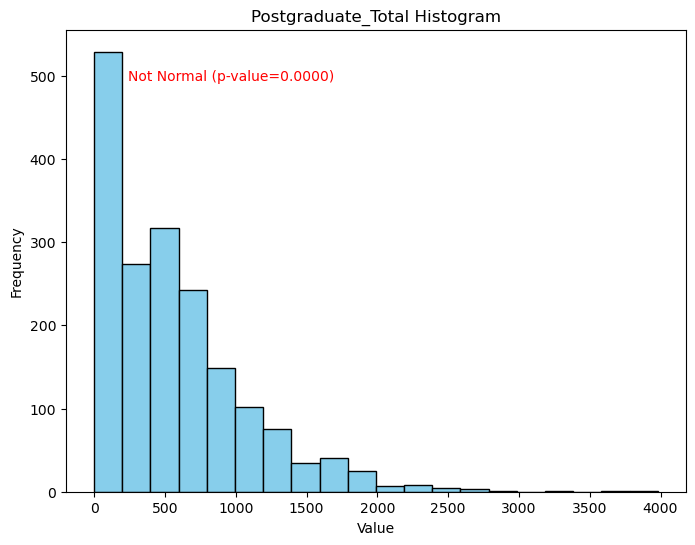

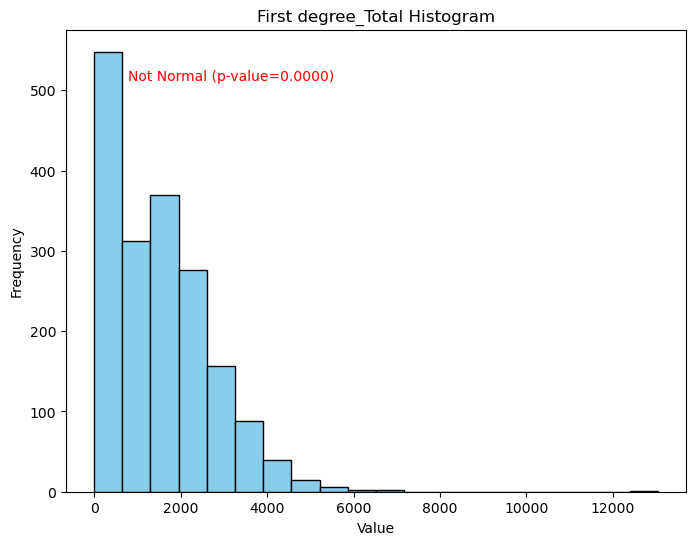

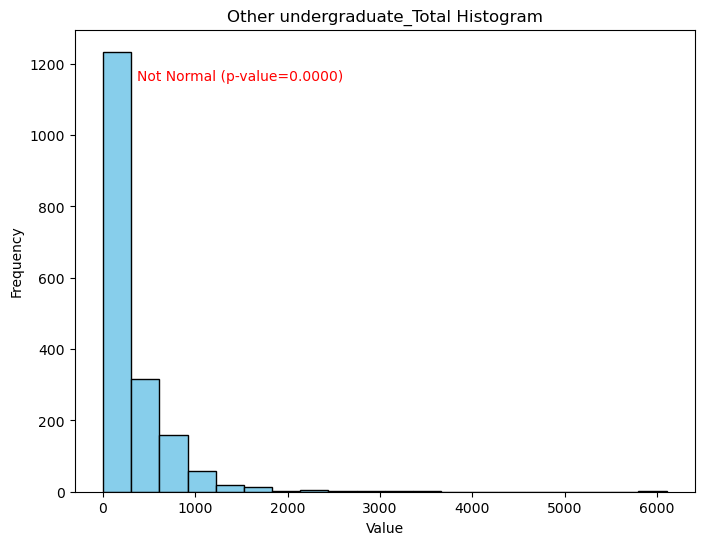

In [45]:
# Draw histograms for each filtered column
for col in columns_to_check:
    plt.figure(figsize=(8, 6))
    plt.hist(merged_df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col + ' Histogram')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    # Check for normality using Shapiro-Wilk test
    stat, p = shapiro(merged_df[col])
    if p > 0.05:
        plt.text(0.1, 0.9, f'Normal (p-value={p:.4f})', ha='left', va='center', transform=plt.gca().transAxes, color='green')
    else:
        plt.text(0.1, 0.9, f'Not Normal (p-value={p:.4f})', ha='left', va='center', transform=plt.gca().transAxes, color='red')
    
    plt.show()